In [4]:
#ARIMA
#!pip install pmdarima --quiet


In [5]:
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima


In [6]:
def load_yf_data(ticker="^GSPC", period="10y"):
    data = yf.Ticker(ticker).history(period=period, interval="1d")
    return data

# Example usage
SPY_data = load_yf_data("^GSPC")        # S&P 500
DOW_data = load_yf_data("^DJI")         # Dow Jones
NASDAQ_data = load_yf_data("^IXIC")     # NASDAQ

In [7]:
def preprocessing(df, column = 'Close', sequence_length = 30, test_size = 0.1): #sequence length is # of days in window
    df = df.copy()
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df[[column]])
    
    X,y = [],[]
    for i in range(sequence_length, len(scaled_data)):
        X.append(scaled_data[i-sequence_length:i, 0])
        y.append(scaled_data[i, 0])

    X,y = np.array(X), np.array(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

    return X_train, X_test, y_train, y_test, scaler

In [8]:
X_train_spy, X_test_spy, y_train_spy, y_test_spy, scaler_spy = preprocessing(SPY_data)
X_train_dow, X_test_dow, y_train_dow, y_test_dow, scaler_dow = preprocessing(DOW_data)
X_train_nasdaq, X_test_nasdaq, y_train_nasdaq, y_test_nasdaq, scaler_nasdaq = preprocessing(NASDAQ_data)

In [9]:
def run_arima(X_train, X_test, y_train, y_test, ticker_label="Index"):
    # Fit Auto ARIMA model to determine best (p, d, q)
    auto_model = auto_arima(y_train, seasonal=False, trace=False, stepwise=True, suppress_warnings=True)
    order = auto_model.order  # Get optimal (p, d, q)

    # Fit ARIMA model
    model = ARIMA(y_train, order=order)
    fitted_model = model.fit()

    # Make predictions
    preds = fitted_model.forecast(steps=len(y_test))

    # Evaluate the model
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    print(f"ARIMA Evaluation Metrics ({ticker_label}):")
    print(f"Best Order: {order}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

    return fitted_model, preds, {'rmse': rmse, 'mae': mae, 'r2': r2}

In [ ]:
model_spy_arima, preds_spy_arima, arima_metrics_spy = run_arima(X_train_spy, X_test_spy, y_train_spy, y_test_spy, ticker_label="S&P 500")
model_dow_arima, preds_dow_arima, arima_metrics_dow = run_arima(X_train_dow, X_test_dow, y_train_dow, y_test_dow, ticker_label="Dow Jones")
model_nasdaq_arima, preds_nasdaq_arima, arima_metrics_nasdaq = run_arima(X_train_nasdaq, X_test_nasdaq, y_train_nasdaq, y_test_nasdaq, ticker_label="NASDAQ")


/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 

ARIMA Evaluation Metrics (S&P 500):
Best Order: (2, 1, 0)
RMSE: 0.1741
MAE:  0.1601
R² Score: -5.4916


/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 

ARIMA Evaluation Metrics (Dow Jones):
Best Order: (2, 1, 0)
RMSE: 0.1398
MAE:  0.1219
R² Score: -3.1436


/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 

ARIMA Evaluation Metrics (NASDAQ):
Best Order: (1, 1, 0)
RMSE: 0.1892
MAE:  0.1740
R² Score: -5.4578


/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [11]:
def plot_predictions(y_actual, y_pred, title='Model Predictions vs Actual'):
    plt.figure(figsize=(12, 6))
    plt.plot(y_actual, label='Actual Prices', linewidth=2)
    plt.plot(y_pred, label='Predicted Prices', linestyle='--')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Index Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [12]:
def plot_full_with_predictions(full_data, column, y_test_actual, y_pred, title='Index Forecast (10-Year Overview)', test_size=0.1):
    import matplotlib.pyplot as plt
    import numpy as np

    full_series = full_data[column].values
    total_len = len(full_series)
    test_len = len(y_test_actual)
    train_len = total_len - test_len

    # Create timeline for plotting
    timeline = full_data.index
    full_range = np.arange(total_len)
    test_range = np.arange(train_len, total_len)

    plt.figure(figsize=(14, 6))
    plt.plot(timeline, full_series, label='Full Historical Data', linewidth=2)
    plt.plot(timeline[test_range], y_test_actual.flatten(), label='Actual Test Data', color='green', linewidth=2)
    plt.plot(timeline[test_range], y_pred.flatten(), label='Predicted Data', linestyle='--', color='red', linewidth=2)

    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Index Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

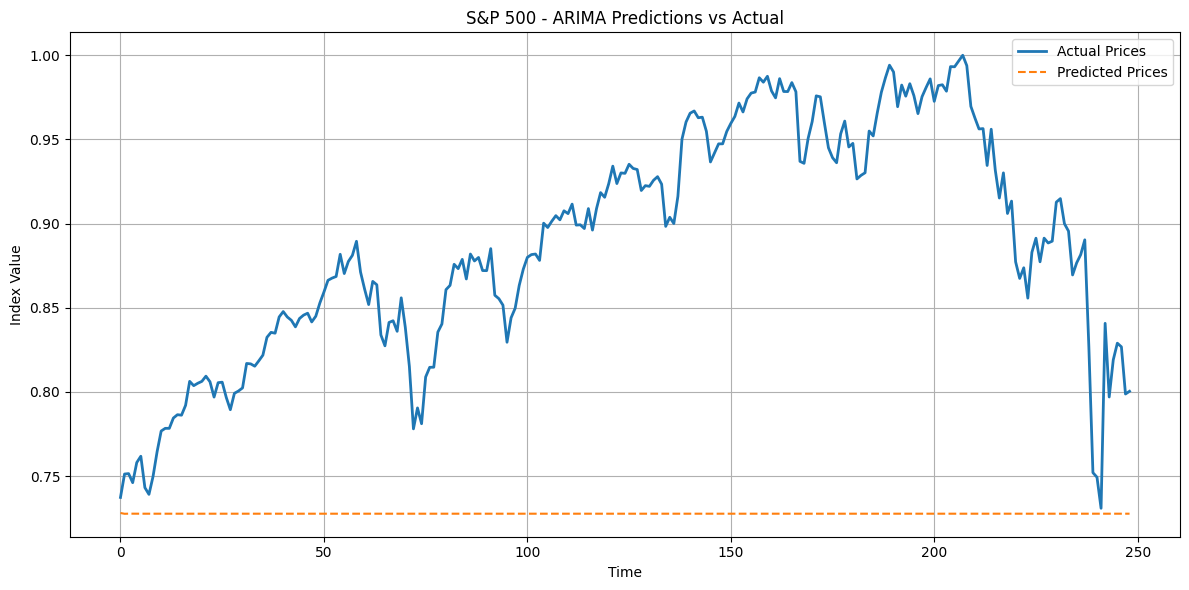

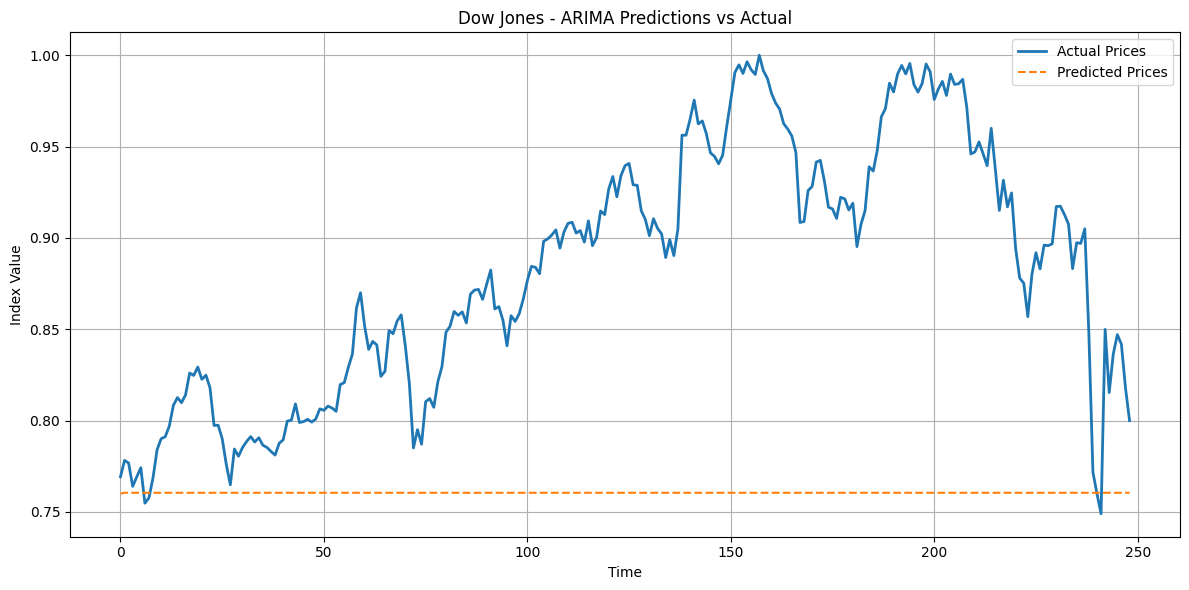

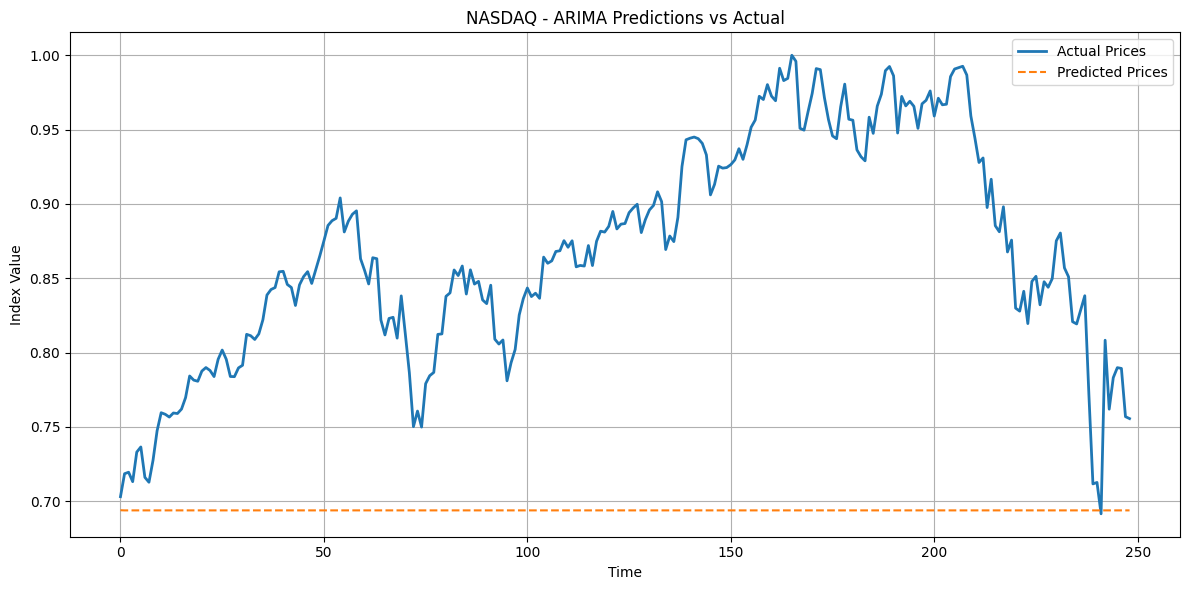

In [13]:
# S&P 500
plot_predictions(y_test_spy, preds_spy_arima, title="S&P 500 - ARIMA Predictions vs Actual")

# Dow Jones
plot_predictions(y_test_dow, preds_dow_arima, title="Dow Jones - ARIMA Predictions vs Actual")

# NASDAQ
plot_predictions(y_test_nasdaq, preds_nasdaq_arima, title="NASDAQ - ARIMA Predictions vs Actual")


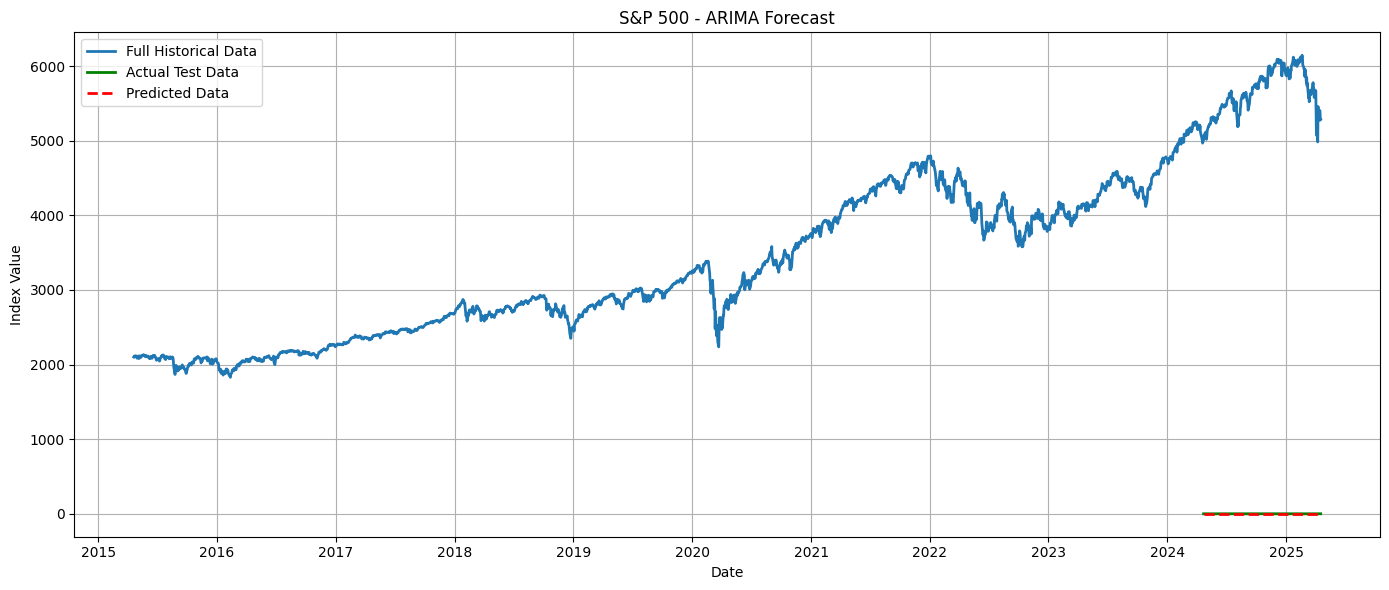

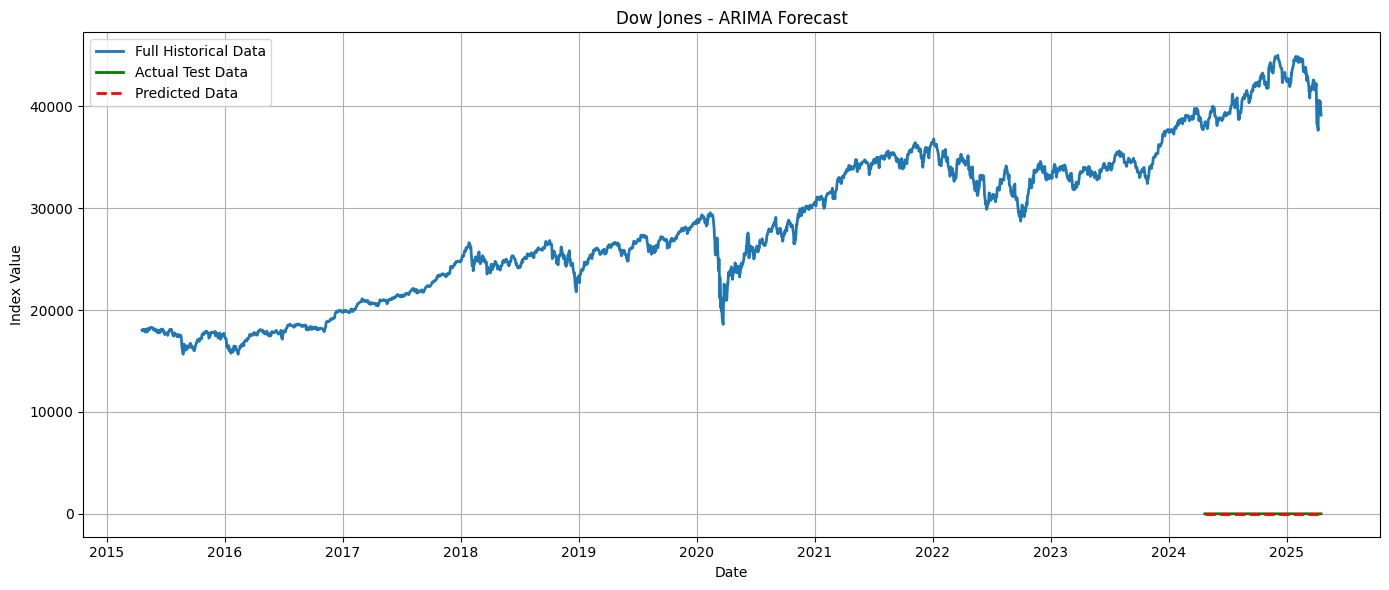

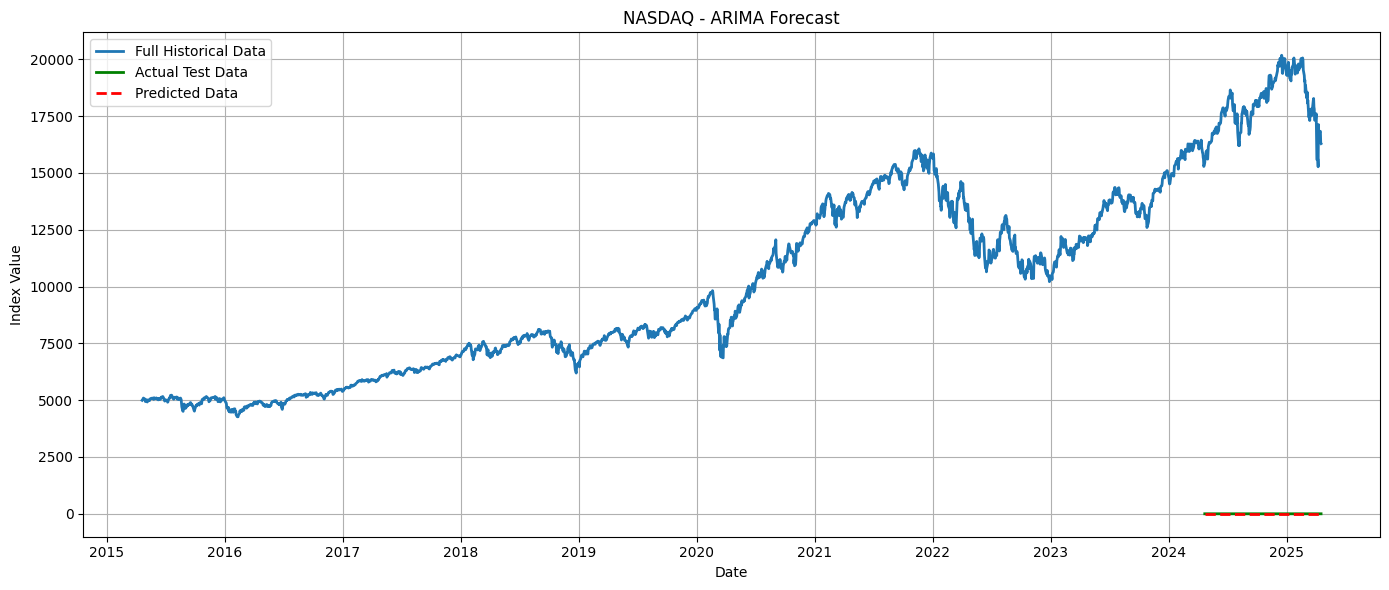

In [14]:
# S&P 500
plot_full_with_predictions(SPY_data, 'Close', y_test_spy, preds_spy_arima, title="S&P 500 - ARIMA Forecast")

# Dow Jones
plot_full_with_predictions(DOW_data, 'Close', y_test_dow, preds_dow_arima, title="Dow Jones - ARIMA Forecast")

# NASDAQ
plot_full_with_predictions(NASDAQ_data, 'Close', y_test_nasdaq, preds_nasdaq_arima, title="NASDAQ - ARIMA Forecast")


In [22]:
def run_tuned_arima(X_train, X_test, y_train, y_test, ticker_label="Index"):
    # Fit auto-ARIMA to the training data
    model = auto_arima(y_train, seasonal=False, stepwise=True, trace=True, suppress_warnings=True)
    
    # Print the best model's order (p, d, q)
    print(f"Best ARIMA Order (p, d, q): {model.order}")

    # Forecast on the test set
    forecast = model.predict(n_periods=len(y_test))

    # Evaluate the model
    rmse = np.sqrt(mean_squared_error(y_test, forecast))
    mae = mean_absolute_error(y_test, forecast)
    r2 = r2_score(y_test, forecast)

    print(f"ARIMA Evaluation Metrics ({ticker_label}):")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

    # Return the fitted model and forecasted values
    return model, forecast, {'rmse': rmse, 'mae': mae, 'r2': r2}


In [23]:
# S&P 500 ARIMA
model_spy_arima, forecast_spy_arima, arima_metrics_spy = run_tuned_arima(X_train_spy, X_test_spy, y_train_spy, y_test_spy, ticker_label="S&P 500")

# Dow Jones ARIMA
model_dow_arima, forecast_dow_arima, arima_metrics_dow = run_tuned_arima(X_train_dow, X_test_dow, y_train_dow, y_test_dow, ticker_label="Dow Jones")

# NASDAQ ARIMA
model_nasdaq_arima, forecast_nasdaq_arima, arima_metrics_nasdaq = run_tuned_arima(X_train_nasdaq, X_test_nasdaq, y_train_nasdaq, y_test_nasdaq, ticker_label="NASDAQ")


/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-14911.411, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-14899.148, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-14916.904, Time=0.11 sec


/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-14915.355, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-14898.521, Time=0.05 sec


/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-14918.297, Time=0.21 sec


/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-14916.496, Time=0.28 sec


/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-14915.977, Time=0.46 sec


/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-14916.583, Time=0.34 sec


/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-14914.572, Time=0.58 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-14917.370, Time=0.08 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 3.025 seconds
Best ARIMA Order (p, d, q): (2, 1, 0)
ARIMA Evaluation Metrics (S&P 500):
RMSE: 0.1360
MAE:  0.1245
R² Score: -2.9615
Performing stepwise search to minimize aic


/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-14249.151, Time=0.92 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-14220.012, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-14242.325, Time=0.11 sec


/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-14239.049, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-14219.965, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-14248.937, Time=0.18 sec


/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-14249.924, Time=0.36 sec


/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-14247.482, Time=0.44 sec


/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-14251.960, Time=0.40 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-14250.025, Time=0.19 sec


/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-14248.079, Time=0.27 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-14251.785, Time=0.16 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 3.243 seconds
Best ARIMA Order (p, d, q): (2, 1, 0)
ARIMA Evaluation Metrics (Dow Jones):
RMSE: 0.1010
MAE:  0.0863
R² Score: -1.1624
Performing stepwise search to minimize aic


/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-14840.178, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-14834.294, Time=0.14 sec


/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-14845.485, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-14844.921, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-14833.899, Time=0.04 sec


/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-14844.491, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-14844.754, Time=0.17 sec


/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-14842.192, Time=0.38 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-14844.684, Time=0.06 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 1.746 seconds
Best ARIMA Order (p, d, q): (1, 1, 0)
ARIMA Evaluation Metrics (NASDAQ):
RMSE: 0.1532
MAE:  0.1397
R² Score: -3.2343


/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


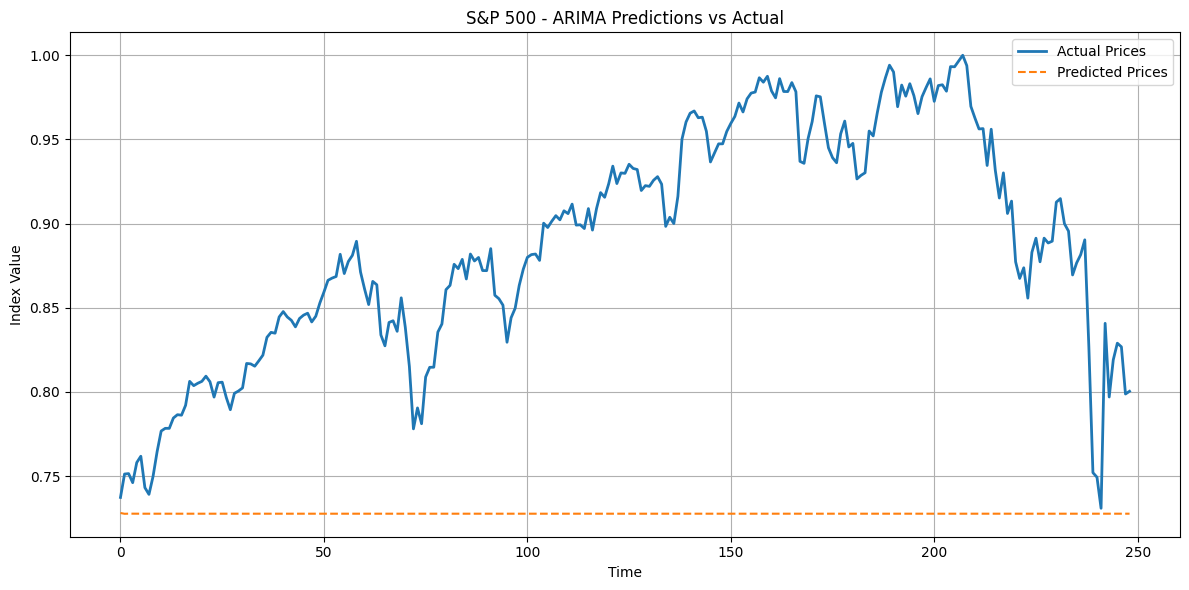

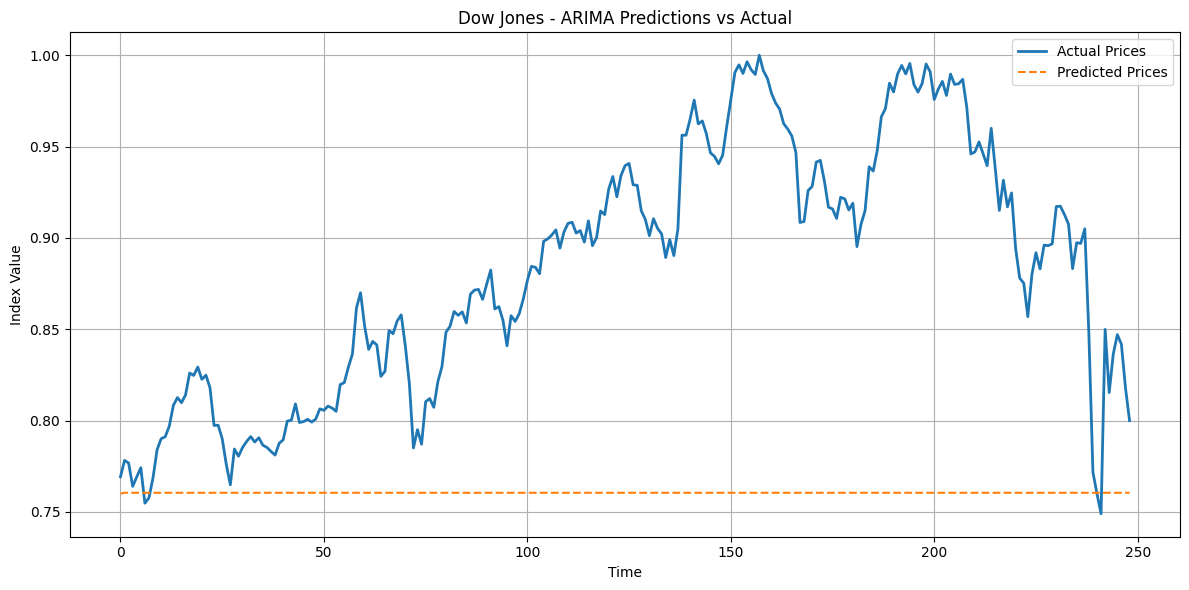

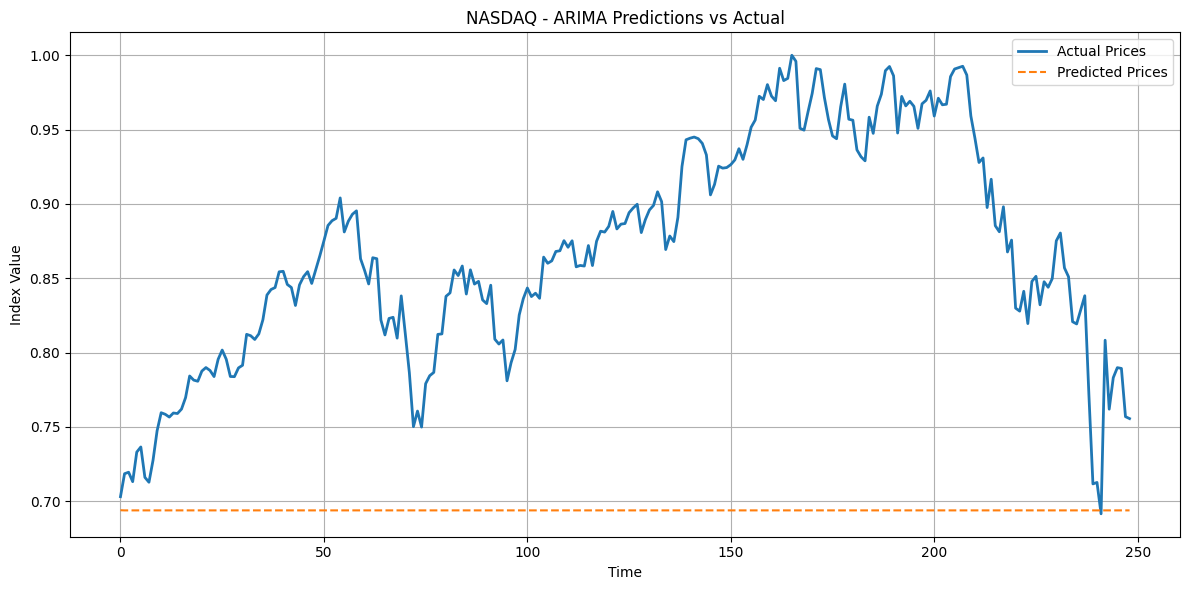

In [24]:
# S&P 500
plot_predictions(y_test_spy, preds_spy_arima, title="S&P 500 - ARIMA Predictions vs Actual")

# Dow Jones
plot_predictions(y_test_dow, preds_dow_arima, title="Dow Jones - ARIMA Predictions vs Actual")

# NASDAQ
plot_predictions(y_test_nasdaq, preds_nasdaq_arima, title="NASDAQ - ARIMA Predictions vs Actual")
